In [2]:
import numpy as np
import os
from collections import Counter

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
from matplotlib import pyplot as plt

In [6]:
import csv

In [7]:
import statsmodels.api as sm

In [17]:
import pandas as pd

In [235]:
from scipy.signal import savgol_filter


`import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords`
`from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, TapTool, CustomJS`
`import plotly.graph_objects as go`

In [5]:
%store -r df

In [357]:
%store -r df_spezial

In [938]:
df_total = df_combined = pd.concat([df, df_spezial], axis=1)
df_total;

In [368]:
max_values = df_total.max()
max_values.sort_values(ascending=False).head(22)

Anzahl Token             60370.0
Anzahl Token             60370.0
Budget                     168.0
Stadtordnung               128.0
Neumarktplatz               98.0
Zwischennutzung             94.0
Finanzstrategie             84.0
Eidgenos                    81.0
Bahnhofplatz                73.0
Museum                      69.0
Strom                       66.0
Kosten                      64.0
Wohnbaugenossenschaft       61.0
Expo                        59.0
Strompreis                  54.0
Baum                        54.0
Bahnhof                     53.0
Parkierungsreglement        51.0
Steuererhöhung              51.0
Kulturinstitution           49.0
Scherrer                    48.0
Fusion                      47.0
dtype: float64

Das scheint mir ziemlich tief zu sein. Ich möchte das mal mit Code Visual vergleichen

Fazit aus visual code: das Resultat stimmt leider überhaupt nicht. Die counts sehen so aus:
Budget* = 5409
Stadtordnung* = 1564
Neumarktplatz* = 307
Zwischennutzung* = 235
Kosten* = 620

Der Fehler ist nicht einmal gleich. Es gibt nur eine Lösung: Von den Wörtern, die über die Tokenisierung als wichtige herausgefischt wurden und denen, von denen ich denke, dass sie wichtig sind. Problem: Bei der Tokenisierung geht leider schon viel schief... 

Ausweg: mit schlichtem Python nach Strings fischen und schauen, obs keine Fehler gibt...

In [379]:
folder_path="/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_de/"
all_text = ""
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            all_text += text
len(all_text)

33286578

### Und nun die französischen Textfiles erstellen!

all_text_fr string erstellen, als .txt speichern. dann die keywords übersetzen und alles nochmals durchlaufen lassen durch den hauptcode

In [9]:
folder_path="/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_fr/"
all_text_fr = ""
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            all_text_fr += text
len(all_text_fr)

15250910

In [102]:
file_path = "cv_99_23.txt"

# Save the string to a text file
with open(file_path, 'w') as file:
    file.write(all_text_fr)

In [11]:
%store -r keywords

In [405]:
#add_to_keywords = ["ESB","Jugendliche","Löhne","Zug","CTS","Einbürgerung","Ortspolizei"]Miete expo
#add_to_keywords = ["ortspolizei"]

In [406]:
#keywords = keywords+add_to_keywords

In [318]:
for elem in mots_cles:
    if elem == "Fusion":
        print(elem)

Fusion


In [439]:
mots_cles = ['police locale','allocation de résidence','expo','contrats de droit de superficie',"axe ouest",'utilisation temporaire', 'embouteillage',
    'Budget',
    'Commission des finances',
    'Coûts',
    'Temps de travail',
    'Règlement de la ville',
    'Trafic',
    'Énergie',
    'Arbre',
    'Investissement',
    'Planification des investissements',
    'Confédéré',
    'Confédéré',
    'Scherrer',
    'Fehr',
    'Impôt',
    "Taux d'imposition",
    'Environnement',
    'Voiture',
    'Intégration',
    'Marché immobilier',
    'Gare',
    'Place de la gare',
    'Palais des congrès',
    'Police',
    'Policier',
    'Place du Marché Neuf',
    'Ordre',
    'Électricité',
    'Augmentation des impôts',
    'Diminution des impôts',
    'Budget',
    'Bus',
    'Économie',
    'Genre',
    'Théâtre',
    'Aide sociale',
    "Taux d'aide sociale",
    'Stratégie financière',
    'Place centrale',
    'Gaz',
    'Rond-point',
    'Guerre',
    'Débat budgétaire',
    'UDC',
    'Autoroute',
    'Agglolac',
    'Épouse',
    'Bilinguisme',
    'Éclairage',
    'Plage',
    'Création de postes',
    'Suppression de postes',
    'Droit de construire',
    'Loyer foncier',
    'Musée',
    'Théâtre',
    'Jeunesse',
    'Contournement',
    'Fontaine',
    'Règlement de police',
    'Violence',
    'Trafic individuel',
    'Conseil fédéral',
    'Assainissement budgétaire',
    'ESB',
    'Liberté',
    'Internet',
    'Mobilité',
    'Rénovation',
    'Innovation',
    'Durabilité',
    "utilisation temporaire d'espaces vacants",
    'faubourg du lac',
    'Institution culturelle',
    'Institution culturelle',
    'Toilette',
    'Poste',
    'Sentier du bord du lac',
    "Garde d'enfants",
    'Colonie de cygnes',
    'Patinoire',
    'Stade',
    'Stades',
    'Recettes fiscales',
    'Externalisation',
    'Parc municipal',
    'Fusion',
    'Piétonnes',
    'Atelier communal',
    'Informatique',
    'Contribuable',
    "Taux d'imposition",
    'Efficacité',
    'Efficacité énergétique',
    'Trajet',
    'Filag',
    'École à journée continue',
    'Autorité sociale',
    'Bras est',
    'Rue',
    'Salle de sport',
    'Pandémie',
    'Centre hospitalier',
    'Coopérative',
    'Coopérative de logement',
    'Capital',
    'Bouchon',
    'Privatisation',
    'Forêt',
    'Protection du climat',
    'Stratégie des propriétaires',
    'Étranger',
    'Étrangers',
    'Gorges du Taubenloch',
    'Réfugié',
    'Climat',
    'Animal',
    'Feu de circulation',
    'Stratégie de mobilité globale',
    'Camions',
    'CTS',
    "Moratoire sur le remplacement d'emplois",
    "Festival d'échecs",
    'Parking souterrain',
    'Espace vert',
    'Manor',
    'Croissance',
    'Manifestation',
    'Club',
    'Vandalisme',
    "Consommation d'énergie",
    'Approvisionnement en énergie',
    'Approvisionnement en eau',
    'Déchets',
    'Stade de football',
    'Bibliothèque municipale',
    'Industrie horlogère',
    'Parc animalier',
    'Tradition',
    "Taux d'intérêt",
    "Mesure d'économie",
    "Mesures d'économie",
    'Vitesse',
    'Faillite',
    'Règlement de stationnement',
    'Nidau',
    'Tunnel',
    'Politique énergétique',
    'Intégration professionnelle',
    'Parking de la vieille ville',
    'Jeunesse',
    'Allocation de logement',
    'Écologie',
    'Ligne de bus',
    'Substance',
    'Convention collective de travail',
    "Protection de l'environnement",
    'Archives municipales',
    "Prix de l'électricité",
    'Musique',
    'Orchestre',
    'Salaires',
    'Rénovation des égouts',
    'Drogue',
    'Installation de stationnement',
    'Alcool',
    'Élimination',
    'Braderie',
    'Police unique',
    'École supérieure',
    'Haute école spécialisée',
    'Promotion économique',
    'Église',
    'Chantier',
    "Conditions d'emploi",
    'Campus',
    'Groupe de suivi',
    'Milliard',
    'Rue de Bözingen',
    'Coupole',
    'Vélo en libre-service',
    'Politique de transport',
    'Circulation piétonne',
    'Trafic automobile',
    'Horaire',
    'Moteur',
    'Zone de rencontre',
    'Train',
    'FC',
    'Logiciel',
    'Électricité',
    "En raison de l'inflation",
    'Loyer',
    'Ménagère',
    'Circulation douce',
    'Augmentation des frais',
    'Pigeon',
    'Consommation',
    'Vacances',
    'Béton',
    'Théâtre municipal',
    'Pavillon',
    'Centrale électrique',
    'Foyers pour personnes âgées',
    'Carnaval',
    'Gymnase',
    'ESB',
    'Jeunes',
    'Salaires',
    'Train',
    'CTS',
    'Naturalisation',
    'Police locale'
];

### The function

Hier hole ich die Stichwörter heraus.

In [440]:
# Define the folder path containing the text files
folder_path = "/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_de"

# Define the list of string elements to search for
string_elements = [keyword.lower() for keyword in keywords]

# Initialize a list to store dictionaries
data_list = []

# Iterate over each text file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        # Extract the index (first seven digits of the file name)
        index = file_name[:7]
        
        # Read the contents of the text file
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read().lower()
        
        # Calculate the length of the text file (string length)
        file_length = len(text)
        
        # Initialize a dictionary to store the data for this file
        file_data = {'Index': index, 'File_Length': file_length}
        
        # Count the occurrences of each string element in the text
        file_counts = {element: text.count(element) for element in string_elements}
        
        # Add the counts to the dictionary
        file_data.update(file_counts)
        
        # Append the dictionary to the list
        data_list.append(file_data)

# Convert the list of dictionaries to a DataFrame
df_simple = pd.DataFrame(data_list)

# Set the index of the DataFrame
df_simple.set_index('Index', inplace=True)

# Display the resulting DataFrame
df_simple

,File_Length,budget,finanzkommission,kosten,arbeitszeit,stadtordnung,verkehr,energie,baum,investition,...,pavillon,kraftwerk,altersheime,fasnacht,gymnasium,einbürgerung,ortspolizei,westast,miete,expo
Index,,,,,,,,,,,,,,,,,,,,,
2022-12,165675,9,0,19,1,0,95,30,5,6,...,0,0,0,0,0,0,0,1,1,0
2011-10,184302,217,0,30,0,5,3,14,0,54,...,0,4,1,0,0,0,0,0,1,2
2011-11,46711,0,0,5,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2000-04,100574,5,0,34,2,4,13,15,0,11,...,0,0,0,0,0,0,0,0,10,0
2000-05,106976,3,0,6,0,1,16,5,1,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02,78880,8,0,13,0,1,4,3,0,6,...,0,0,0,0,0,0,0,0,13,0
2010-01,106329,2,0,18,0,0,21,0,0,9,...,0,2,0,2,0,0,0,1,4,0
2004-08,115503,1,0,6,0,8,61,8,1,2,...,0,0,0,0,0,1,0,0,2,7


In [441]:
df_simple.index = pd.to_datetime(df_simple.index)

In [442]:
df_simple = df_simple.sort_index()

In [443]:
df_simple2 = df_simple.drop(columns=['File_Length'])

In [444]:
for elem in df_simple2.columns:
    if elem == "wohnsitzzulage":
        print(elem)

wohnsitzzulage


### En français

In [445]:
# Define the folder path containing the text files
folder_path = "/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_fr"

# Define the list of string elements to search for
string_elements = [mot.lower() for mot in mots_cles]

# Initialize a list to store dictionaries
data_list_fr = []

# Iterate over each text file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        # Extract the index (first seven digits of the file name)
        index = file_name[:7]
        
        # Read the contents of the text file
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read().lower()
        
        # Calculate the length of the text file (string length)
        file_length = len(text)
        
        # Initialize a dictionary to store the data for this file
        file_data = {'Index': index, 'File_Length': file_length}
        
        # Count the occurrences of each string element in the text
        file_counts = {element: text.count(element) for element in string_elements}
        
        # Add the counts to the dictionary
        file_data.update(file_counts)
        
        # Append the dictionary to the list
        data_list_fr.append(file_data)

# Convert the list of dictionaries to a DataFrame
df_fr = pd.DataFrame(data_list_fr)

# Set the index of the DataFrame
df_fr.set_index('Index', inplace=True)

# Display the resulting DataFrame
df_fr;

In [446]:
df_fr.index = pd.to_datetime(df_fr.index)

In [447]:
df_fr = df_fr.sort_index()

In [448]:
df_fr2 = df_fr.drop(columns=['File_Length'])
df_fr2

,police locale,allocation de résidence,expo,contrats de droit de superficie,axe ouest,utilisation temporaire,embouteillage,budget,commission des finances,coûts,...,vacances,béton,théâtre municipal,pavillon,centrale électrique,foyers pour personnes âgées,carnaval,gymnase,jeunes,naturalisation
Index,,,,,,,,,,,,,,,,,,,,,
1999-01-01,0,0,20,0,0,0,2,3,0,0,...,1,0,0,0,0,0,0,0,15,0
1999-02-01,0,0,11,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-03-01,0,0,17,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,1,0
1999-04-01,0,0,7,0,0,0,0,7,4,0,...,0,0,0,0,0,0,0,0,1,0
1999-05-01,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0,0,1,0,0,0,0,0,0,6,...,0,1,0,0,0,0,0,0,5,0
2023-06-01,0,0,3,0,0,0,0,21,0,14,...,0,0,0,2,0,0,0,0,9,2
2023-08-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [449]:
#df_res_sel = df_res_sel.rolling(window=10).mean()

In [450]:
hot_topics = df_simple2.max().sort_values(ascending=False).head(50)

In [451]:
hot_topics

post                     273
budget                   248
strom                    231
steuer                   211
esb                      195
tier                     190
verkehr                  160
ordnung                  153
bahnhof                  150
zwischennutzung          144
genossenschaft           143
cts                      140
strasse                  135
expo                     128
stadtordnung             128
kosten                   111
klima                    108
einbürgerung             108
jugend                   106
energie                  105
neumarktplatz             99
svp                       89
wohnbaugenossenschaft     89
finanzstrategie           85
zug                       85
nidau                     83
polizei                   82
eidgenos                  81
eidgenosse                81
agglolac                  75
bahnhofplatz              74
auto                      74
umwelt                    73
baurecht                  73
löhne         

In [452]:
sujets_hot = df_fr2.max().sort_values(ascending=False).head(50)
sujets_hot

poste                    145
police                   110
budget                    91
règlement de police       79
jeunes                    67
nidau                     65
musée                     64
économie                  62
bilinguisme               58
cts                       57
théâtre                   54
esb                       53
intégration               52
gare                      50
train                     46
ordre                     42
orchestre                 42
expo                      41
énergie                   39
rue                       39
impôt                     39
agglolac                  39
rénovation                37
udc                       36
stade                     35
substance                 35
arbre                     34
climat                    34
confédéré                 33
investissement            33
bus                       33
environnement             32
gaz                       32
aide sociale              32
musique       

In [453]:
data_table1 = pd.DataFrame(hot_topics,columns=['Hot Topics'])
data_table1;

In [454]:
evergreen_topics = df_simple2.mean().sort_values(ascending=False).head(50)
evergreen_topics

tier                   53.301961
post                   45.262745
verkehr                26.196078
zug                    25.749020
kosten                 23.607843
strasse                22.901961
budget                 21.211765
steuer                 19.721569
ordnung                17.352941
esb                    14.866667
svp                    14.301961
energie                10.984314
gas                    10.772549
investition             9.796078
wirtschaft              9.070588
auto                    8.811765
polizei                 7.870588
eidgenos                7.686275
eidgenosse              7.682353
bus                     7.537255
fehr                    7.501961
expo                    6.803922
stau                    6.709804
baurecht                6.694118
baum                    6.666667
bahnhof                 6.607843
stadtordnung            6.133333
cts                     5.498039
scherrer                5.478431
umwelt                  5.058824
strom     

In [455]:
sujets_evergreen = df_fr2.mean().sort_values(ascending=False).head(50)
sujets_evergreen

budget                   9.050980
poste                    6.533333
rue                      6.074510
jeunes                   5.458824
ordre                    4.952941
investissement           4.223529
udc                      4.117647
économie                 3.745098
police                   3.568627
esb                      3.254902
intégration              3.109804
bilinguisme              3.015686
cts                      2.952941
confédéré                2.584314
énergie                  2.576471
expo                     2.549020
impôt                    2.321569
coûts                    2.223529
bus                      2.200000
trafic                   1.976471
train                    1.858824
jeunesse                 1.811765
gare                     1.811765
aide sociale             1.807843
règlement de la ville    1.792157
rénovation               1.533333
environnement            1.505882
théâtre                  1.466667
stade                    1.305882
manifestation 

In [456]:
data_table2 = pd.DataFrame(evergreen_topics,columns=['evergreens'])
data_table2;

In [457]:
#df_simple2.var().sort_values(ascending=True).head(50).tail(49);

In [458]:
data_table1.to_csv('hot_topics.csv')
data_table2.to_csv('evergreens.csv')

In [459]:
topics = list(set(evergreen_topics.keys()) | set(hot_topics.keys()))
topics.remove("post")#kommt von Postulat, postulierend, etc.

In [460]:
topics

['wirtschaft',
 'freiheit',
 'strom',
 'esb',
 'museum',
 'ordnung',
 'umwelt',
 'klima',
 'beton',
 'zug',
 'stadtordnung',
 'bahnhof',
 'fahrt',
 'finanzstrategie',
 'löhne',
 'svp',
 'baurecht',
 'investitionsplanung',
 'bus',
 'cts',
 'jugend',
 'genossenschaft',
 'kapital',
 'wohnbaugenossenschaft',
 'expo',
 'sozialhilfe',
 'nidau',
 'theater',
 'strasse',
 'stadien',
 'polizei',
 'verkehr',
 'scherrer',
 'neumarktplatz',
 'steuer',
 'fusion',
 'auto',
 'eidgenos',
 'westast',
 'kosten',
 'miete',
 'energie',
 'kongresshaus',
 'eidgenosse',
 'integration',
 'bahnhofplatz',
 'agglolac',
 'strompreis',
 'ferien',
 'tier',
 'baum',
 'fehr',
 'gas',
 'wald',
 'mietzins',
 'budget',
 'jugendliche',
 'mobilität',
 'zwischennutzung',
 'stau',
 'investition',
 'einbürgerung']

In [461]:
sujets = list(set(sujets_evergreen.keys())|set(sujets_hot.keys()))
sujets

['confédéré',
 'arbre',
 'aide sociale',
 'voiture',
 'jeunes',
 'esb',
 'étrangers',
 'gare',
 'genre',
 'cts',
 'bus',
 'intégration',
 'règlement de police',
 'économie',
 'police',
 'bilinguisme',
 'coûts',
 'udc',
 'manifestation',
 'coupole',
 'expo',
 'train',
 'musée',
 'ordre',
 'stades',
 'rue',
 'impôt',
 'nidau',
 'électricité',
 'gaz',
 'climat',
 'place de la gare',
 'guerre',
 'énergie',
 'salaires',
 'club',
 'mobilité',
 'rénovation',
 'musique',
 'théâtre',
 'investissement',
 'étranger',
 'informatique',
 'agglolac',
 'substance',
 'jeunesse',
 'orchestre',
 'pigeon',
 'fehr',
 'environnement',
 'trafic',
 'liberté',
 'loyer',
 'budget',
 'pandémie',
 'poste',
 'règlement de la ville',
 'plage',
 'stade',
 'autorité sociale']

In [462]:
sujets_de = ['bundesrat', 'steuern', 'sozialhilfe', 'auto', 'jugend', 'esb', 'ausländer', 'bahnhof', 'geschlecht', 'cts', 'bus', 'integration', 'polizeireglement', 'wirtschaft', 'polizei', 'zweisprachigkeit', 'kosten', 'svp', 'demonstration', 'kuppel', 'zug', 'museum', 'ordnung', 'stadien', 'strasse', 'steuer', 'nidau', 'elektrizität', 'gas', 'genossenschaft', 'klima', 'bahnhofplatz', 'krieg', 'energie', 'löhne', 'club', 'mobilität', 'renovation', 'musik', 'theater', 'investition', 'ausländer', 'informatik', 'agglolac', 'substanz', 'jugendliche', 'orchester', 'tauben', 'fehr', 'umwelt', 'verkehr', 'freiheit', 'miete', 'budget', 'pandemie', 'post', 'stadtrecht', 'strand', 'stadion', 'sozialbehörde']
sujets_de

['bundesrat',
 'steuern',
 'sozialhilfe',
 'auto',
 'jugend',
 'esb',
 'ausländer',
 'bahnhof',
 'geschlecht',
 'cts',
 'bus',
 'integration',
 'polizeireglement',
 'wirtschaft',
 'polizei',
 'zweisprachigkeit',
 'kosten',
 'svp',
 'demonstration',
 'kuppel',
 'zug',
 'museum',
 'ordnung',
 'stadien',
 'strasse',
 'steuer',
 'nidau',
 'elektrizität',
 'gas',
 'genossenschaft',
 'klima',
 'bahnhofplatz',
 'krieg',
 'energie',
 'löhne',
 'club',
 'mobilität',
 'renovation',
 'musik',
 'theater',
 'investition',
 'ausländer',
 'informatik',
 'agglolac',
 'substanz',
 'jugendliche',
 'orchester',
 'tauben',
 'fehr',
 'umwelt',
 'verkehr',
 'freiheit',
 'miete',
 'budget',
 'pandemie',
 'post',
 'stadtrecht',
 'strand',
 'stadion',
 'sozialbehörde']

In [463]:
topics_de_fr = list(set(topics)|set(sujets_de))

In [464]:
topics_de_fr

['wirtschaft',
 'freiheit',
 'strom',
 'bundesrat',
 'esb',
 'museum',
 'umwelt',
 'ordnung',
 'klima',
 'beton',
 'zug',
 'stadion',
 'stadtordnung',
 'bahnhof',
 'fahrt',
 'orchester',
 'finanzstrategie',
 'stadtrecht',
 'löhne',
 'svp',
 'baurecht',
 'investitionsplanung',
 'pandemie',
 'bus',
 'cts',
 'sozialbehörde',
 'jugend',
 'genossenschaft',
 'kapital',
 'wohnbaugenossenschaft',
 'expo',
 'sozialhilfe',
 'nidau',
 'zweisprachigkeit',
 'demonstration',
 'theater',
 'strasse',
 'stadien',
 'strand',
 'polizei',
 'verkehr',
 'scherrer',
 'neumarktplatz',
 'steuer',
 'fusion',
 'krieg',
 'steuern',
 'auto',
 'eidgenos',
 'westast',
 'kosten',
 'club',
 'miete',
 'energie',
 'kongresshaus',
 'eidgenosse',
 'integration',
 'bahnhofplatz',
 'agglolac',
 'strompreis',
 'informatik',
 'ferien',
 'substanz',
 'geschlecht',
 'tier',
 'elektrizität',
 'baum',
 'polizeireglement',
 'kuppel',
 'fehr',
 'musik',
 'tauben',
 'post',
 'gas',
 'wald',
 'renovation',
 'mietzins',
 'budget',
 'j

In [465]:
not_relevant = ["post","kuppel","tier","eidgenosse","club","eidgenos","fahrt"]
topics_de_fr_rel = [elem for elem in topics_de_fr if not elem in not_relevant]
topics_de_fr_rel

['wirtschaft',
 'freiheit',
 'strom',
 'bundesrat',
 'esb',
 'museum',
 'umwelt',
 'ordnung',
 'klima',
 'beton',
 'zug',
 'stadion',
 'stadtordnung',
 'bahnhof',
 'orchester',
 'finanzstrategie',
 'stadtrecht',
 'löhne',
 'svp',
 'baurecht',
 'investitionsplanung',
 'pandemie',
 'bus',
 'cts',
 'sozialbehörde',
 'jugend',
 'genossenschaft',
 'kapital',
 'wohnbaugenossenschaft',
 'expo',
 'sozialhilfe',
 'nidau',
 'zweisprachigkeit',
 'demonstration',
 'theater',
 'strasse',
 'stadien',
 'strand',
 'polizei',
 'verkehr',
 'scherrer',
 'neumarktplatz',
 'steuer',
 'fusion',
 'krieg',
 'steuern',
 'auto',
 'westast',
 'kosten',
 'miete',
 'energie',
 'kongresshaus',
 'integration',
 'bahnhofplatz',
 'agglolac',
 'strompreis',
 'informatik',
 'ferien',
 'substanz',
 'geschlecht',
 'elektrizität',
 'baum',
 'polizeireglement',
 'fehr',
 'musik',
 'tauben',
 'gas',
 'wald',
 'renovation',
 'mietzins',
 'budget',
 'jugendliche',
 'mobilität',
 'ausländer',
 'zwischennutzung',
 'stau',
 'inve

In [466]:
topics_de_fr_rel_FR=['police locale','allocation de résidence','expo','budget','économie', 'liberté', 'électricité', 'conseil fédéral', 'moteur', 'esb', 'musée', 'environnement', 'ordre', 'climat', 'béton', 'train', 'stade', 'règlement de la ville', 'gare', 'orchestre', 'stratégie financière', 'salaires', 'udc','contrats de droit de superficie', 'planification des investissements', 'pandémie', 'bus', 'cts', 'autorité sociale', 'jeunesse', 'coopérative', 'capital', 'aide sociale', 'nidau', 'bilinguisme', 'manifestation', 'théâtre', 'stades', 'police', 'trafic', 'scherrer', 'place du marché neuf', 'impôt', 'fusion', 'guerre', 'voiture', 'axe ouest', 'coûts', 'loyer', 'énergie', 'palais des congrès', 'intégration', 'place de la gare', 'agglolac', "prix de l'électricité", 'informatique', 'vacances', 'substance', 'genre', 'arbre', 'règlement de police', 'fehr', 'musique', 'gaz', 'forêt', 'rénovation', 'loyer', 'budget', 'jeunes', 'mobilité', 'étrangers', 'utilisation temporaire', 'embouteillage', 'investissement', 'naturalisation']



In [467]:
for elem in topics_de_fr_rel_FR:
    if elem not in df_fr2.columns:
        print(elem)

In [468]:
topics_de_fr_rel_DE=['ortspolizei','wohnsitzzulage','expo','budget','wirtschaft', 'freiheit', 'strom', 'bundesrat', 'motor', 'esb', 'museum', 'umwelt', 'ordnung', 'klima', 'beton', 'zug', 'stadion', 'stadtordnung', 'bahnhof', 'orchester', 'finanzstrategie', 'löhne', 'svp', 'baurecht', 'investitionsplanung', 'pandemie', 'bus', 'cts', 'sozialbehörde', 'jugend', 'genossenschaft', 'kapital', 'sozialhilfe', 'nidau', 'zweisprachigkeit', 'demonstration', 'theater', 'stadien', 'polizei', 'verkehr', 'scherrer', 'neumarktplatz', 'steuer', 'fusion', 'krieg', 'auto', 'westast', 'kosten', 'miete', 'energie', 'kongresshaus', 'integration', 'bahnhofplatz', 'agglolac', 'strompreis', 'informatik', 'ferien', 'substanz', 'geschlecht', 'baum', 'polizeireglement', 'fehr', 'musik', 'gas', 'wald', 'renovation', 'mietzins', 'budget', 'jugendliche', 'mobilität', 'ausländer', 'zwischennutzung', 'stau', 'investition', 'einbürgerung']



In [469]:
for elem in topics_de_fr_rel_DE:
    if elem not in df_simple2.columns:
        print(elem)

In [470]:
print(len(topics_de_fr_rel_DE),len(topics_de_fr_rel_FR))

75 75


In [471]:
for elem_fr,elem_de in zip(topics_de_fr_rel_FR,topics_de_fr_rel_DE):
    print (elem_fr,elem_de)

police locale ortspolizei
allocation de résidence wohnsitzzulage
expo expo
budget budget
économie wirtschaft
liberté freiheit
électricité strom
conseil fédéral bundesrat
moteur motor
esb esb
musée museum
environnement umwelt
ordre ordnung
climat klima
béton beton
train zug
stade stadion
règlement de la ville stadtordnung
gare bahnhof
orchestre orchester
stratégie financière finanzstrategie
salaires löhne
udc svp
contrats de droit de superficie baurecht
planification des investissements investitionsplanung
pandémie pandemie
bus bus
cts cts
autorité sociale sozialbehörde
jeunesse jugend
coopérative genossenschaft
capital kapital
aide sociale sozialhilfe
nidau nidau
bilinguisme zweisprachigkeit
manifestation demonstration
théâtre theater
stades stadien
police polizei
trafic verkehr
scherrer scherrer
place du marché neuf neumarktplatz
impôt steuer
fusion fusion
guerre krieg
voiture auto
axe ouest westast
coûts kosten
loyer miete
énergie energie
palais des congrès kongresshaus
intégration i

In [472]:
df_de_fr = df_simple2.copy()

In [473]:
for elem, element in zip(topics_de_fr_rel_DE,topics_de_fr_rel_FR):
    df_de_fr[str(elem)] = df_de_fr[str(elem)]+df_fr2[str(element)]

In [474]:
df_de_fr

,budget,finanzkommission,kosten,arbeitszeit,stadtordnung,verkehr,energie,baum,investition,investitionsplanung,...,pavillon,kraftwerk,altersheime,fasnacht,gymnasium,einbürgerung,ortspolizei,westast,miete,expo
Index,,,,,,,,,,,,,,,,,,,,,
1999-01-01,10,2,45,0,5,27,4,1,14,1,...,0,0,0,0,0,0,0,0,5,28
1999-02-01,11,1,14,1,9,27,12,0,2,0,...,0,0,0,0,1,0,0,0,2,109
1999-03-01,14,0,34,17,8,29,7,36,19,3,...,0,0,0,0,0,0,0,0,4,61
1999-04-01,22,6,24,0,10,32,44,1,26,6,...,0,0,0,1,1,0,0,0,2,26
1999-05-01,0,0,16,1,3,23,6,0,4,1,...,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,1,0,12,0,0,2,0,3,8,1,...,0,0,0,0,0,0,0,0,8,1
2023-06-01,58,0,41,1,31,10,71,17,24,0,...,0,2,0,0,0,2,0,0,4,4
2023-08-01,3,0,40,0,4,13,3,4,5,0,...,0,0,0,0,0,0,0,0,17,0


In [496]:
maxs = df_de_fr.max().sort_values(ascending=False).head(20)

In [499]:
means = df_de_fr.mean().sort_values(ascending=False).head(20)

In [500]:
top_subjects = list(set(maxs.keys())|set(means.keys()))
top_subjects

['wirtschaft',
 'verkehr',
 'strom',
 'steuer',
 'auto',
 'esb',
 'kosten',
 'ordnung',
 'klima',
 'zug',
 'energie',
 'stadtordnung',
 'bahnhof',
 'svp',
 'cts',
 'bus',
 'investition',
 'tier',
 'genossenschaft',
 'post',
 'expo',
 'gas',
 'nidau',
 'budget',
 'strasse',
 'zwischennutzung',
 'polizeireglement',
 'polizei']

In [490]:
choice = ["bahnhof","baurecht"]

In [491]:
df_plot = df_de_fr[[col for col in df_de_fr.columns if col in choice]].copy()

In [492]:
smoothed_data = savgol_filter(df_plot.values, window_length=5, polyorder=3, axis=0)

In [493]:
df_res_sel = df_plot.resample('6M').mean()#.interpolate(method='polynomial',order=7)

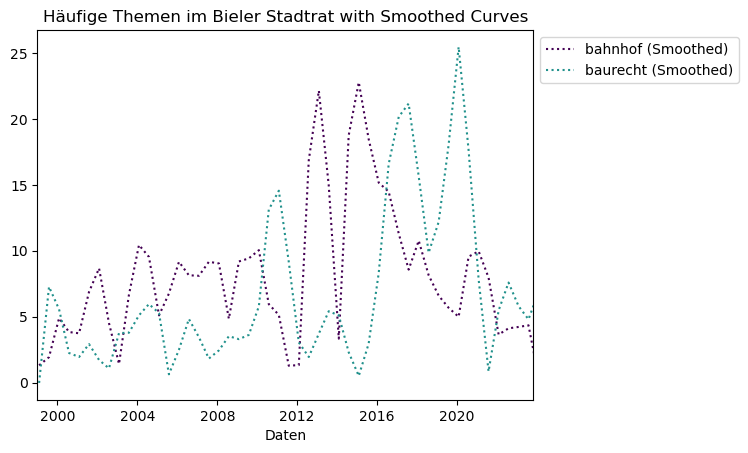

In [494]:
smoothed_data = savgol_filter(df_res_sel.values, window_length=5, polyorder=3, axis=0)

# Plot the scatterplots for the original data
#plt.figure(figsize=(12, 6))
#for i, column in enumerate(df_res_sel.columns[0:], start=0):
#    plt.scatter(df_res_sel.index, df_res_sel[column], label=column, color=plt.cm.viridis(i / (len(df_res_sel.columns))), alpha=0.5)  # Scatterplot for original data

# Plot the smoothed curves on top of the scatterplots
for i, column in enumerate(df_res_sel.columns[0:], start=0):
    plt.plot(df_res_sel.index, smoothed_data[:, i], label=column + ' (Smoothed)', linestyle=':', color=plt.cm.viridis(i / (len(df_res_sel.columns))))  # Smoothed data

# Add titles, labels, legend, and set x-axis limits
plt.title('Häufige Themen im Bieler Stadtrat with Smoothed Curves')
plt.xlabel('Daten')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2023-10-30'))

# Save the figure
plt.savefig('budget.png', dpi=300, bbox_inches='tight')
plt.show()

In [933]:
import statsmodels.api as sm

# Assuming df is your DataFrame with a datetime index
# Define a function to calculate the trend for each column
def calculate_trend(column):
    # Add a constant term to the independent variable (datetime index)
    X = sm.add_constant(column.index.values.astype(float))
    y = column.values

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Return the slope (trend) of the fitted line
    return model.params[1]

# Apply the function to each column of the DataFrame
trends = df_simple2.apply(calculate_trend)

# Display the trends
#print(trends)

** On entry to DGELSD, parameter number  6 had an illegal value
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require I

In [937]:
trends.sort_values(ascending=False).head(20)

Post            3.468673e-17
zug             1.683485e-17
Verkehr         1.367298e-17
Budget          1.335672e-17
Steuer          1.203299e-17
Kosten          1.071413e-17
Energie         8.085882e-18
ESB             7.908529e-18
Investition     7.047962e-18
Strasse         6.687148e-18
Eidgenosse      6.642757e-18
Eidgenos        6.642757e-18
Auto            5.755825e-18
Fehr            5.745916e-18
Bahnhof         4.912231e-18
Stadtordnung    4.833344e-18
Bus             4.757467e-18
Stöckli         4.634423e-18
Baurecht        4.611028e-18
Gas             4.231067e-18
dtype: float64

### Problem: strings mit 'wort+ending'

Weil spacy nicht funktionierte, könnte es sein, dass auch Wörter Teil von anderen Wörtern sind, die nicht vom selben Thema handeln. Zwei Beispiele in den Daten: Strings, die mit "post" anfangen, können für "Post" stehen, aber auch für Postulat, postulieren.

Deshalb Strategie: Mit einer Regex herausfischen, was nach den hier interessierenden Strings kommt.

In [495]:
import re

In [501]:
top_subjects

['wirtschaft',
 'verkehr',
 'strom',
 'steuer',
 'auto',
 'esb',
 'kosten',
 'ordnung',
 'klima',
 'zug',
 'energie',
 'stadtordnung',
 'bahnhof',
 'svp',
 'cts',
 'bus',
 'investition',
 'tier',
 'genossenschaft',
 'post',
 'expo',
 'gas',
 'nidau',
 'budget',
 'strasse',
 'zwischennutzung',
 'polizeireglement',
 'polizei']

In [502]:
weitere_subjects = ["agglolac","einbürgerung","wohnsitzzulage","ortspolizei","fusion","baurecht"]

In [504]:
#Regex-Liste kreieren
woerter = top_subjects + weitere_subjects

woerter_reg_list = []
for elem in woerter:
    reg = f"(\S*{elem}\w*)[\s\n]"
    woerter_reg_list.append(reg)